In [1]:
import pandas as pd 
from IPython.display import HTML
import numpy as np

from pandas import Series, DataFrame, Panel

<ipython-input-1-831639f283db>:5: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Series, DataFrame, Panel


In [2]:
#read data
dataset = pd.read_csv('/home/prawin/employee .csv')

In [5]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
df = DataFrame(dict(
    Age=dataset.Age,
    HourlyRate=dataset.HourlyRate
    ))

In [23]:
age=df['Age']
maxage=age.max()
minage=age.min()
avgAge=age.mean()

print("max age",maxage)
print("min age",minage)
print("avg age",avgAge)

max age 60
min age 18
avg age 36.923809523809524


In [27]:
HourlyRate=df['HourlyRate']
maxHourlyRate=HourlyRate.max()
minHourlyRate=HourlyRate.min()
avgHourlyRate=HourlyRate.mean()

print("max HourlyRate",maxHourlyRate)
print("min HourlyRate",minHourlyRate)
print("avg HourlyRate",avgHourlyRate)

max HourlyRate 100
min HourlyRate 30
avg HourlyRate 65.89115646258503


In [52]:
# Age min and working hour is above avg.
Age_min=df[(df.HourlyRate > avgHourlyRate) & (df.Age > minage)]
#count of records
toatl_Age_min = len(Age_min.axes[0])
print("toatl_Age_min",toatl_Age_min)

# Age above avg and working hour is less than avg hour rate
age_above_avg=df[(df.HourlyRate < avgHourlyRate) & (df.Age < avgAge)]
#count of records
TotalRow_has_age_above_avg = len(age_above_avg.axes[0])
print("TotalRow_has_age_above_avg",TotalRow_has_age_above_avg)

#age below avg and working hours greater than min Hourlyrate
age_below_avg=df[(df.HourlyRate > minHourlyRate) & (df.Age < avgAge)]
TotalRow_has_age_below_avg = len(age_below_avg.axes[0])
print("TotalRow_has_age_below_avg",TotalRow_has_age_below_avg)

toatl_Age_min 559
TotalRow_has_age_above_avg 724
TotalRow_has_age_below_avg 1451


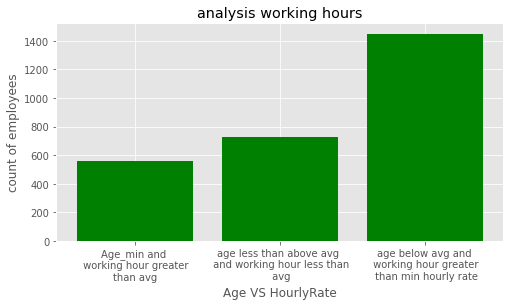

In [61]:
%matplotlib inline
plt.style.use('ggplot')

x = ['Age_min and \n working hour greater\nthan avg', 'age less than above avg \n and working hour less than\n avg', 'age below avg and\n working hour greater\n than min hourly rate']

data=[toatl_Age_min,TotalRow_has_age_above_avg,TotalRow_has_age_below_avg]

x_pos = [i for i, _ in enumerate(x)]

plt.rcParams["figure.figsize"] = (8, 4)

plt.bar(x_pos, data, color='green')
plt.xlabel("Age VS HourlyRate")
plt.ylabel("count of employees")
plt.title("analysis working hours")

plt.xticks(x_pos, x)

plt.show()